
# <font color='blue'>Ensemble Methods</font>

## Bagging

Bagging is used for building multiple models (typically of the same type) from different subsets in the training dataset.

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

A Bagging classifier is a meta-estimator ensemble that makes the base classifier fit, each in random subsets of the original dataset. It then aggregates its predictions (by vote or by average) to form a final prediction. 

Such a meta-estimator can typically be used to reduce the variance of an estimator (for example, a decision tree), introducing randomization into its construction procedure and making an ensemble (set) from it.

In [1]:
# importing libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# loading data
digits = load_digits()

<Figure size 432x288 with 0 Axes>

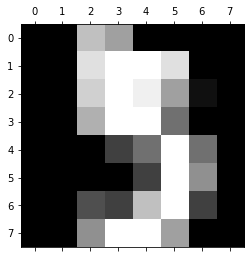

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show() 

In [4]:
# pre-processing
# Putting all data on the same scale
data = scale(digits.data)

In [5]:
# Predictor variables and target variable
X = data
y = digits.target

In [6]:
# Classifier Construction
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

In [7]:
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [8]:
?cross_val_score

In [9]:
# Model score
scores = cross_val_score(bagging, X, y)

In [10]:
# Average score
mean = scores.mean()

In [11]:
print(scores)

[0.95016611 0.93656093 0.94798658]


In [12]:
print(mean)

0.9449045416765015


## Extremely Randomized Trees (ExtraTrees)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [13]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

In [14]:
# Loading Data
digits = load_digits()

In [15]:
# Pre-Processing
data = scale(digits.data)

In [16]:
# Variáveis preditoras e variável target
X = data
y = digits.target

In [17]:
# Creating the classifier with a decision tree
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.73920266 0.8163606  0.76845638]
0.7746732115493016


In [18]:
# Creating the classifier with Random Forest
clf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.90863787 0.9015025  0.90436242]
0.904834264678386


In [19]:
# Creating the classifier with Extra Tree
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.89202658 0.90984975 0.91610738]
0.9059945700686877


## Adaboost

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

An AdaBoost classifier is a meta-estimator that begins by adjusting a classifier in the original dataset and then changing additional copies of the classifier in the same dataset. Still, where the weights of the incorrectly classified instances are adjusted, subsequent classifiers focus more on complex cases.

In [20]:
# Import
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score

In [21]:
# Loading data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart = fetch_openml("heart")

In [22]:
heart

{'data': <270x13 sparse matrix of type '<class 'numpy.float64'>'
 	with 3378 stored elements in Compressed Sparse Row format>,
 'target': array([ 1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
         1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
         1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
         1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
         1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
         1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
         1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1

In [23]:
X = heart.data
y = np.copy(heart.target)
y[y == -1] = 0

In [24]:
X

<270x13 sparse matrix of type '<class 'numpy.float64'>'
	with 3378 stored elements in Compressed Sparse Row format>

In [25]:
y

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [26]:
# Training and test datasets
X_test, y_test = X[189:], y[189:]
X_train, y_train = X[:189], y[:189]

In [27]:
# Building the base estimator
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)

In [28]:
# Building the first version of the Adaboost model
ada_clf_v1 = AdaBoostClassifier(base_estimator = estim_base, 
                                learning_rate = 0.1, 
                                n_estimators = 400, 
                                algorithm = "SAMME")

In [29]:
# Model training
ada_clf_v1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [30]:
# Score
scores = cross_val_score(ada_clf_v1, X_test, y_test)
print(scores)
means = scores.mean()
print(means)

[0.78571429 0.77777778 0.73076923]
0.7647537647537647


In [31]:
# Building the second version of the Adaboost model
ada_clf_v2 = AdaBoostClassifier(base_estimator = estim_base, 
                                learning_rate = 1.0, 
                                n_estimators = 400, 
                                algorithm = "SAMME")

In [32]:
# Model training
ada_clf_v2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [33]:
# Score
scores = cross_val_score(ada_clf_v2, X_test, y_test)
print(scores)
means = scores.mean()
print(means)

[0.75       0.85185185 0.76923077]
0.790360873694207
